In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

df_train = pd.read_csv('C:/Users/18409/OneDrive/Desktop/work/project/时间序列预测demo/LSTM_时序预测/archive/DailyDelhiClimateTrain.csv', index_col=0, parse_dates=['date'])  # parse_dates自动处理日期
df_test = pd.read_csv('C:/Users/18409/OneDrive/Desktop/work/project/时间序列预测demo/LSTM_时序预测/archive/DailyDelhiClimateTest.csv', index_col=0, parse_dates=['date'])
df_train

C:\Users\18409\AppData\Local\Temp\ipykernel_26584\1180744313.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


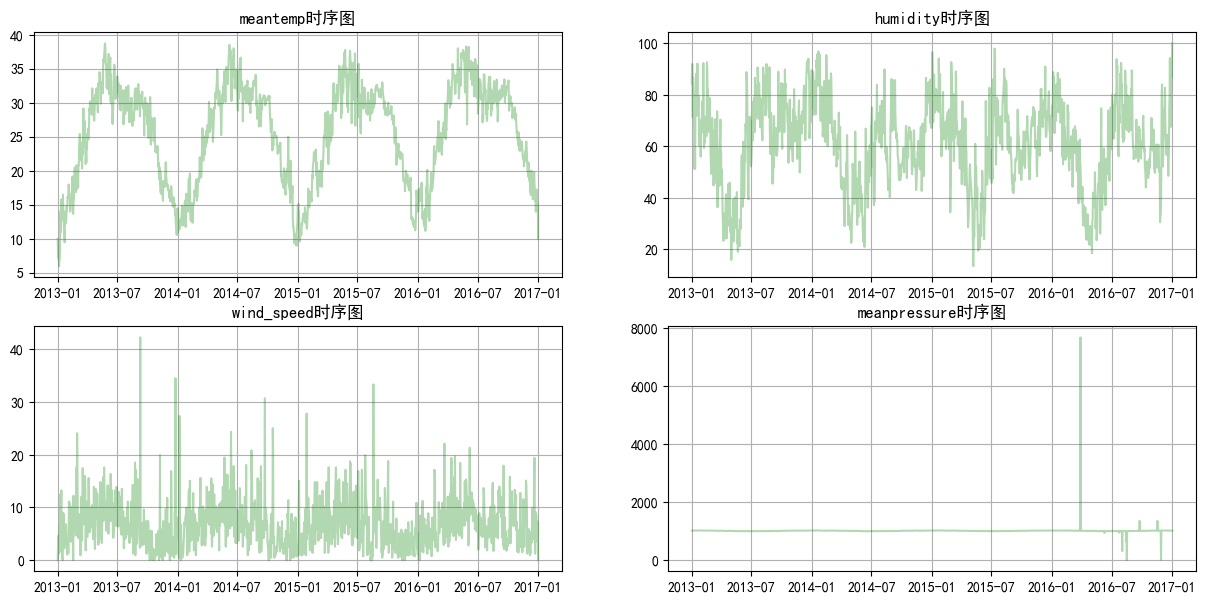

In [3]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(df_train['meantemp'], color='g',  alpha=0.3)
plt.title('meantemp时序图')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(df_train['humidity'], color='g',  alpha=0.3)
plt.title('humidity时序图')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(df_train['wind_speed'], color='g',  alpha=0.3)
plt.title('wind_speed时序图')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(df_train['meanpressure'], color='g',  alpha=0.3)
plt.title('meanpressure时序图')
plt.grid(True)
plt.show()

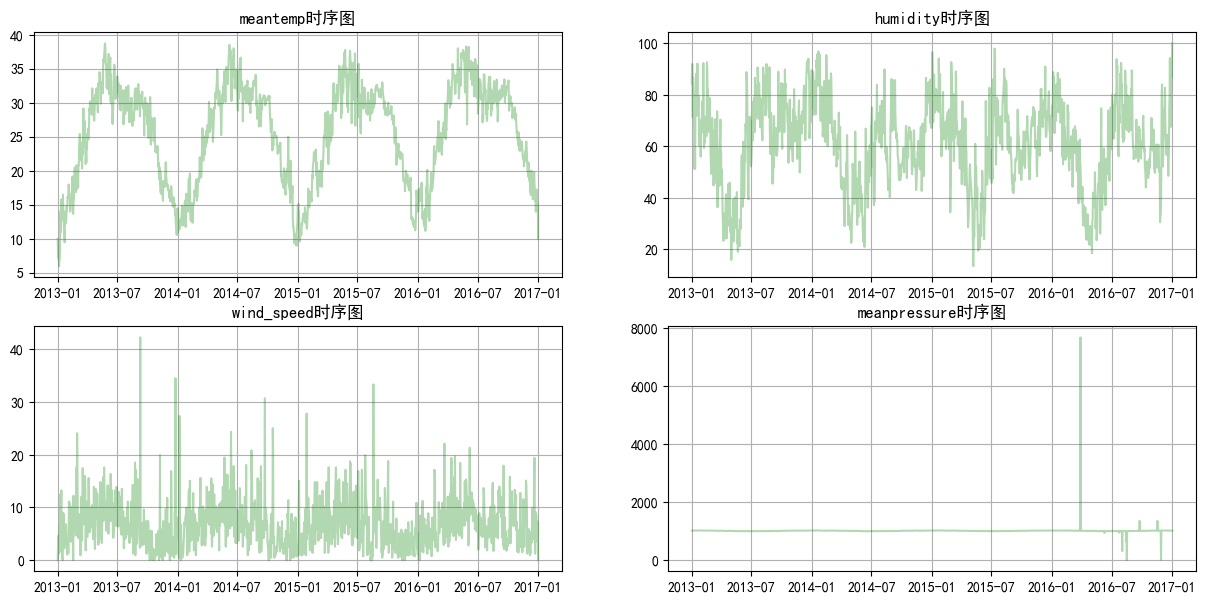

In [4]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(df_train['meantemp'], color='g',  alpha=0.3)
plt.title('meantemp时序图')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(df_train['humidity'], color='g',  alpha=0.3)
plt.title('humidity时序图')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(df_train['wind_speed'], color='g',  alpha=0.3)
plt.title('wind_speed时序图')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(df_train['meanpressure'], color='g',  alpha=0.3)
plt.title('meanpressure时序图')
plt.grid(True)
plt.show()

C:\Users\18409\AppData\Local\Temp\ipykernel_26584\2914754048.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(vals_orig[i] - median) > t0 * mad:


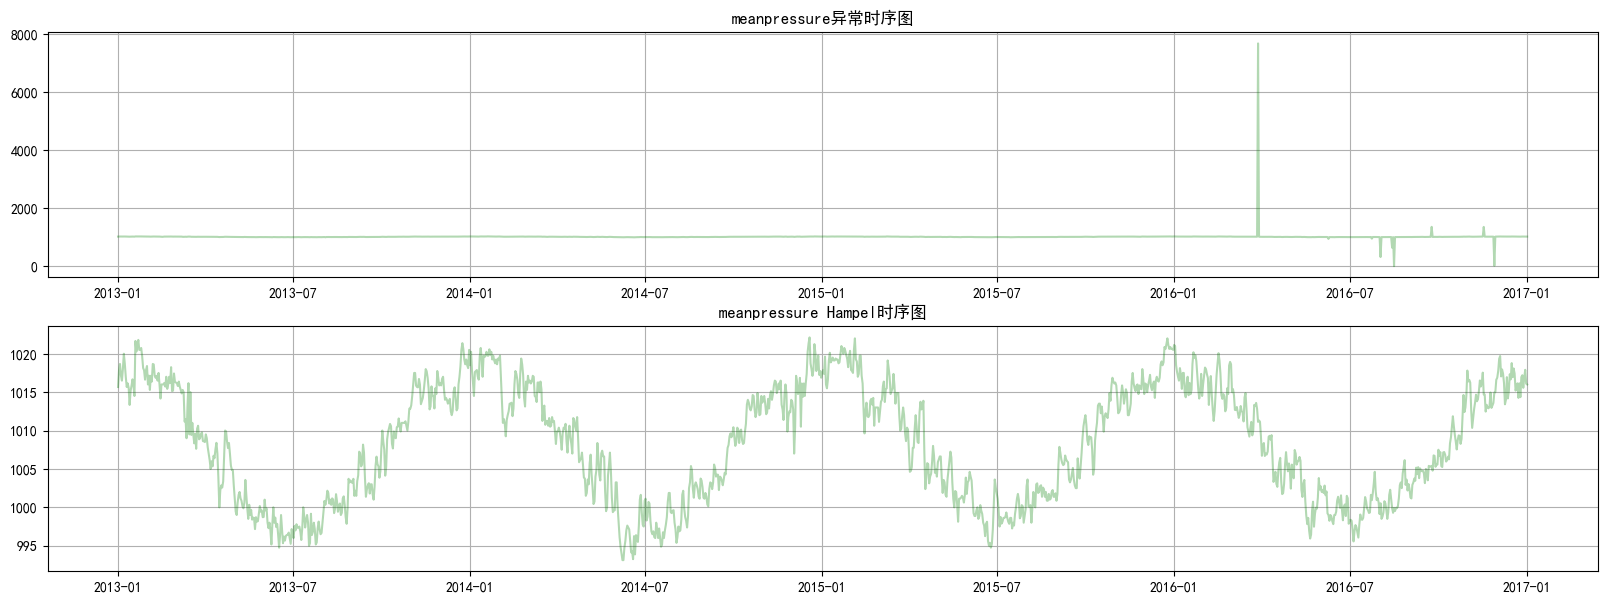

In [5]:
def hampel(vals_orig, k=7, t0=3):
    vals_filt = np.copy(vals_orig)
    outliers_indices = []
    n = len(vals_orig)

    for i in range(k, n - k):
        window = vals_orig[i - k:i + k + 1]
        median = np.median(window)
        mad = np.median(np.abs(window - median))
        if np.abs(vals_orig[i] - median) > t0 * mad:
            vals_filt[i] = median
            outliers_indices.append(i)

    return vals_filt, outliers_indices
filtered_data, outliers_indices = hampel(df_train['meanpressure'])

go_over = df_train['meanpressure']
df_train['meanpressure'] = filtered_data

plt.figure(figsize=(20, 7))
plt.subplot(2, 1, 1)
plt.plot(go_over, color='g',  alpha=0.3)
plt.title('meanpressure异常时序图')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(df_train['meanpressure'], color='g',  alpha=0.3)
plt.title('meanpressure Hampel时序图')
plt.grid(True)
plt.show()


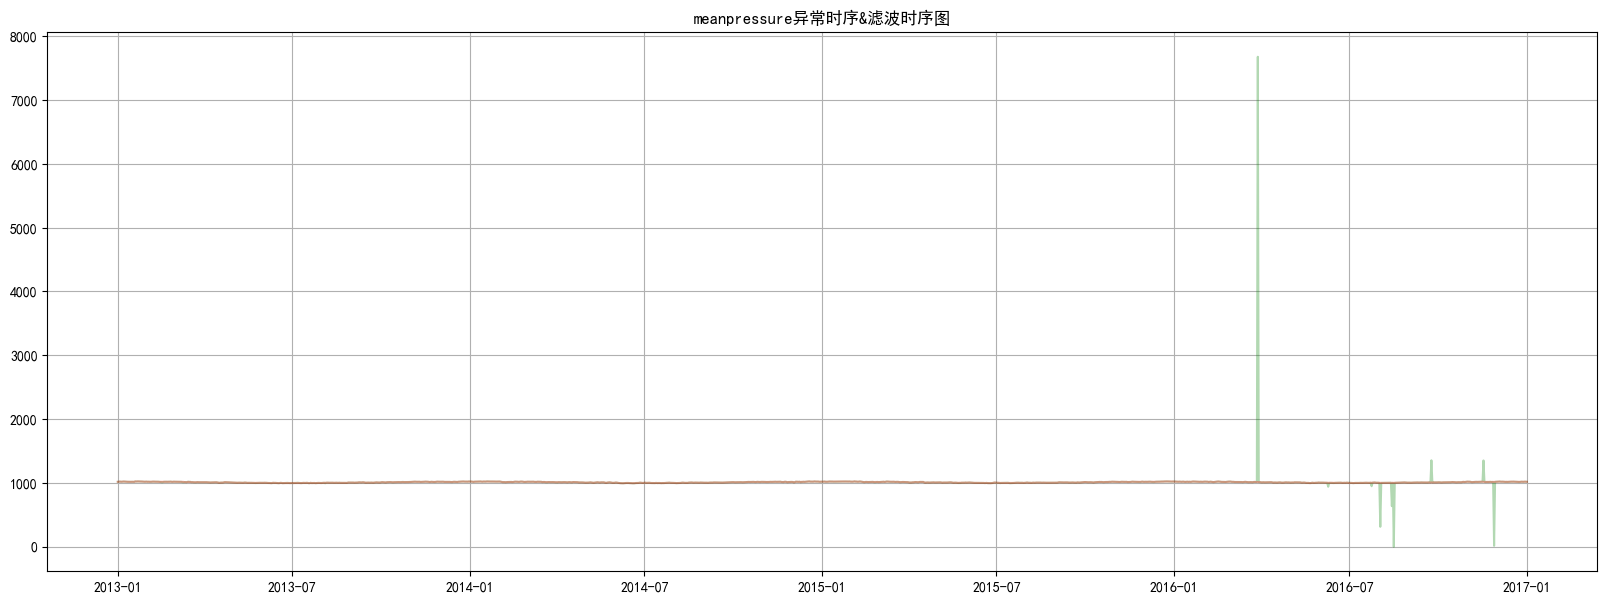

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(go_over, color='g',  alpha=0.3)
plt.plot(df_train['meanpressure'], color='r',  alpha=0.3)
plt.title('meanpressure异常时序&滤波时序图')
plt.grid(True)


In [7]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(train_df, test_df):
    scaler = MinMaxScaler()
    scaler.fit(train_df)  # 在训练集上拟合归一化模型
    train_data = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns, index = df_train.index)
    test_data = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns, index = df_test.index)
    return train_data, test_data

data_train, data_test = normalize_dataframe(df_train, df_test)
data_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,0.122271,0.820957,0.000000,0.777299
2013-01-02,0.042795,0.907591,0.070583,0.850862
2013-01-03,0.035662,0.849835,0.109743,0.880747
2013-01-04,0.081514,0.668867,0.029212,0.829023
2013-01-05,0.000000,0.847910,0.087636,0.806034
...,...,...,...,...
2016-12-28,0.342890,0.630865,0.084032,0.773801
2016-12-29,0.282387,0.859736,0.142113,0.819992
2016-12-30,0.247453,0.880638,0.148429,0.854475


In [8]:
# 滑动窗口不包含待预测特征
import numpy as np
def prepare_data(data, win_size, target_feature_idx, exclude_features=[]):
    num_features = data.shape[1] - len(exclude_features)  # 更新特征数量
    X = []  # 用于存储输入特征的列表
    y = []  # 用于存储目标值的列表

    # 遍历数据，形成样本窗口
    for i in range(len(data) - win_size):
        temp_x = []
        for j in range(data.shape[1]):
            if j != target_feature_idx and j not in exclude_features:
                temp_x.append(data[i:i + win_size, j])  # 提取窗口大小范围内的输入特征
        temp_y = data[i + win_size, target_feature_idx]  # 提取对应的目标值
        X.append(temp_x)
        y.append(temp_y)

    # 转换列表为 NumPy 数组，并调整维度顺序
    X = np.asarray(X).transpose(0, 2, 1)  
    y = np.asarray(y)

    return X, y

win_size = 12
target_feature_idx = 0 # 指定待预测特征
exclude_features = [0] #  需要删除的自变量特征也就是不把待预测的特征纳入输入特征进行时间窗口划分
train_x, train_y = prepare_data(data_train.values, win_size, target_feature_idx)
test_x, test_y = prepare_data(data_test.values, win_size, target_feature_idx)
print("训练集形状:", train_x.shape, train_y.shape)
print("测试集形状:", test_x.shape, test_y.shape)

训练集形状: (1450, 12, 3) (1450,)
测试集形状: (102, 12, 3) (102,)


In [9]:
train_x

array([[[0.8209571 , 0.        , 0.77729885],
        [0.90759076, 0.07058266, 0.85086207],
        [0.84983498, 0.10974262, 0.88074713],
        ...,
        [0.56105611, 0.17527238, 0.77729885],
        [0.43729373, 0.25038912, 0.79371921],
        [0.69966997, 0.31332476, 0.77401478]],

       [[0.90759076, 0.07058266, 0.85086207],
        [0.84983498, 0.10974262, 0.88074713],
        [0.66886689, 0.02921206, 0.82902299],
        ...,
        [0.43729373, 0.25038912, 0.79371921],
        [0.69966997, 0.31332476, 0.77401478],
        [0.71314631, 0.10974262, 0.69683908]],

       [[0.84983498, 0.10974262, 0.88074713],
        [0.66886689, 0.02921206, 0.82902299],
        [0.84790979, 0.08763619, 0.80603448],
        ...,
        [0.69966997, 0.31332476, 0.77401478],
        [0.71314631, 0.10974262, 0.69683908],
        [0.86331133, 0.01460603, 0.76005747]],

       ...,

       [[0.59041529, 0.15208037, 0.86063218],
        [0.49284928, 0.24666712, 0.83805419],
        [0.40550055, 0

In [10]:
# 滑动窗口包含待预测特征
def prepare_data(data, win_size, target_feature_idx):
    num_features = data.shape[1]
    X = []  
    y = []  
    for i in range(len(data) - win_size):
        temp_x = data[i:i + win_size, :]  
        temp_y = data[i + win_size, target_feature_idx]  
        X.append(temp_x)
        y.append(temp_y)
    X = np.asarray(X)
    y = np.asarray(y)

    return X, y

win_size = 12 # 时间窗口
target_feature_idx = 0 # 指定待预测特征列
train_x, train_y = prepare_data(data_train.values, win_size, target_feature_idx)
test_x, test_y = prepare_data(data_test.values, win_size, target_feature_idx)
print("训练集形状:", train_x.shape, train_y.shape)
print("测试集形状:", test_x.shape, test_y.shape)

训练集形状: (1450, 12, 4) (1450,)
测试集形状: (102, 12, 4) (102,)


In [13]:
# 余弦退火
import tensorflow as tf
from tensorflow.python.keras import backend as K
from keras.callbacks import Callback

class CosineAnnealingWarmupScheduler(Callback):
    def __init__(self, initial_lr, total_steps, warmup_steps):
        super(CosineAnnealingWarmupScheduler, self).__init__()
        self.initial_lr = initial_lr
        self.total_steps = total_steps
        self.warmup_steps = warmup_steps
        self.step_in_epoch = 0

    def on_batch_begin(self, batch, logs=None):
        self.step_in_epoch += 1
        lr = self.initial_lr * self.get_lr()
        K.set_value(self.model.optimizer.lr, lr)

    def get_lr(self):
        if self.step_in_epoch < self.warmup_steps:
            return self.step_in_epoch / self.warmup_steps
        progress = (self.step_in_epoch - self.warmup_steps) / (self.total_steps - self.warmup_steps)
        return 0.5 * (1.0 + tf.math.cos(progress * np.pi))

Epoch 1/100
46/46 [==============================] - 1s 10ms/step - loss: 0.1161 - val_loss: 0.0338
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0098
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0085
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0074
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0067
Epoch 6/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 8/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 9/100
46/46 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 10/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 11

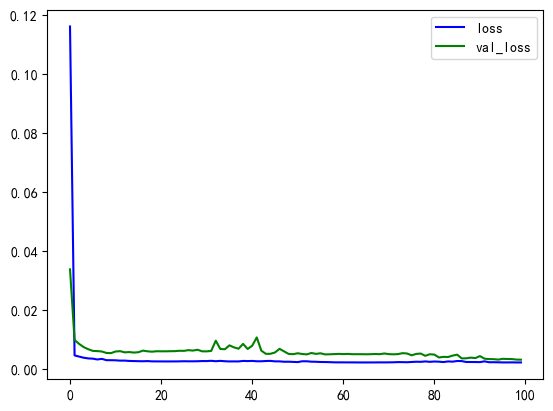

In [14]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

# 定义超参数
initial_lr = 0.001
total_steps = 1000
warmup_steps = 10
epochs = 100
batch_size=32

# 模型构建
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# 编译模型
model.compile(loss='mse', optimizer = 'adam')

# 创建自定义学习率调度器回调
lr_scheduler = CosineAnnealingWarmupScheduler(initial_lr, total_steps, warmup_steps)

# 模型拟合
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y), callbacks=[lr_scheduler])

plt.figure()
plt.plot(history.history['loss'], c='b', label = 'loss')
plt.plot(history.history['val_loss'], c='g', label = 'val_loss')
plt.legend()
plt.show()

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               68096     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 78,465
Trainable params: 78,465
Non-trainable params: 0
_________________________________________________________________


In [34]:
from sklearn import metrics
y_pred = model.predict(test_x)
# 计算均方误差（MSE）
mse = metrics.mean_squared_error(test_y, np.array([i for arr in y_pred for i in arr]))
# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)
# 计算平均绝对误差（MAE）
mae = metrics.mean_absolute_error(test_y, np.array([i for arr in y_pred for i in arr]))
from sklearn.metrics import r2_score # 拟合优度
r2 = r2_score(test_y, np.array([i for arr in y_pred for i in arr]))
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("拟合优度:", r2)

4/4 [==============================] - 0s 11ms/step
均方误差 (MSE): 2.349139149900937
均方根误差 (RMSE): 1.5326901676140998
平均绝对误差 (MAE): 0.19265491162842488
拟合优度: -63.332705848469274


In [15]:
from sklearn import metrics
y_pred = model.predict(test_x)
# 计算均方误差（MSE）
mse = metrics.mean_squared_error(test_y, np.array([i for arr in y_pred for i in arr]))
# 计算均方根误差（RMSE）
rmse = np.sqrt(mse)
# 计算平均绝对误差（MAE）
mae = metrics.mean_absolute_error(test_y, np.array([i for arr in y_pred for i in arr]))
from sklearn.metrics import r2_score # 拟合优度
r2 = r2_score(test_y, np.array([i for arr in y_pred for i in arr]))
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("拟合优度:", r2)

4/4 [==============================] - 0s 2ms/step
均方误差 (MSE): 0.003156941507421702
均方根误差 (RMSE): 0.05618666663383495
平均绝对误差 (MAE): 0.04374064952277722
拟合优度: 0.9135451003886474


In [16]:
len(y_pred)

102

In [18]:
def predict_future(model, initial_sequence, steps):
    predicted_values = []  # 存储预测结果
    current_sequence = initial_sequence.copy()  # 初始序列
    for i in range(steps):
        # 使用模型进行单步预测
        predicted_value = model.predict(current_sequence.reshape(1, initial_sequence.shape[0], initial_sequence.shape[1]))
        # 将预测结果添加到列表中
        predicted_values.append(predicted_value[0][0])
        # 更新当前序列，删除第一个时间步并将预测值添加到最后一个时间步
        current_sequence[:-1] = current_sequence[1:]
        current_sequence[-1] = predicted_value
    return predicted_values

# 使用该函数进行预测
steps_to_predict =  11 # 要预测的步数
predicted_values = predict_future(model, test_x[-1], steps_to_predict)

train_max = np.max(df_train['meantemp'])
train_min = np.min(df_train['meantemp'])



1/1 [==============================] - 0s 14ms/step


In [19]:
predicted_values

[0.8142647,
 0.70665777,
 0.696437,
 0.6960082,
 0.702093,
 0.7130251,
 0.7247147,
 0.73446286,
 0.7386004,
 0.7398605,
 0.7370674]

In [22]:
test_y*(train_max-train_min)+train_min

array([13.23529412, 13.2       , 16.43478261, 14.65      , 11.72222222,
       13.04166667, 14.61904762, 15.26315789, 15.39130435, 18.44      ,
       18.11764706, 18.34782609, 21.        , 16.17857143, 16.5       ,
       14.86363636, 15.66666667, 16.44444444, 16.125     , 15.25      ,
       17.09090909, 15.63636364, 18.7       , 18.63157895, 16.88888889,
       15.125     , 15.7       , 15.375     , 14.66666667, 15.625     ,
       16.25      , 16.33333333, 16.875     , 17.57142857, 20.25      ,
       21.3       , 21.125     , 22.36363636, 23.375     , 21.83333333,
       19.125     , 18.625     , 19.125     , 19.        , 18.75      ,
       19.875     , 23.33333333, 24.46153846, 23.75      , 20.5       ,
       19.125     , 19.75      , 20.        , 22.625     , 21.54545455,
       20.78571429, 19.9375    , 18.53333333, 17.375     , 17.44444444,
       18.        , 19.875     , 24.        , 20.9       , 24.69230769,
       24.66666667, 23.33333333, 25.        , 27.25      , 28.  

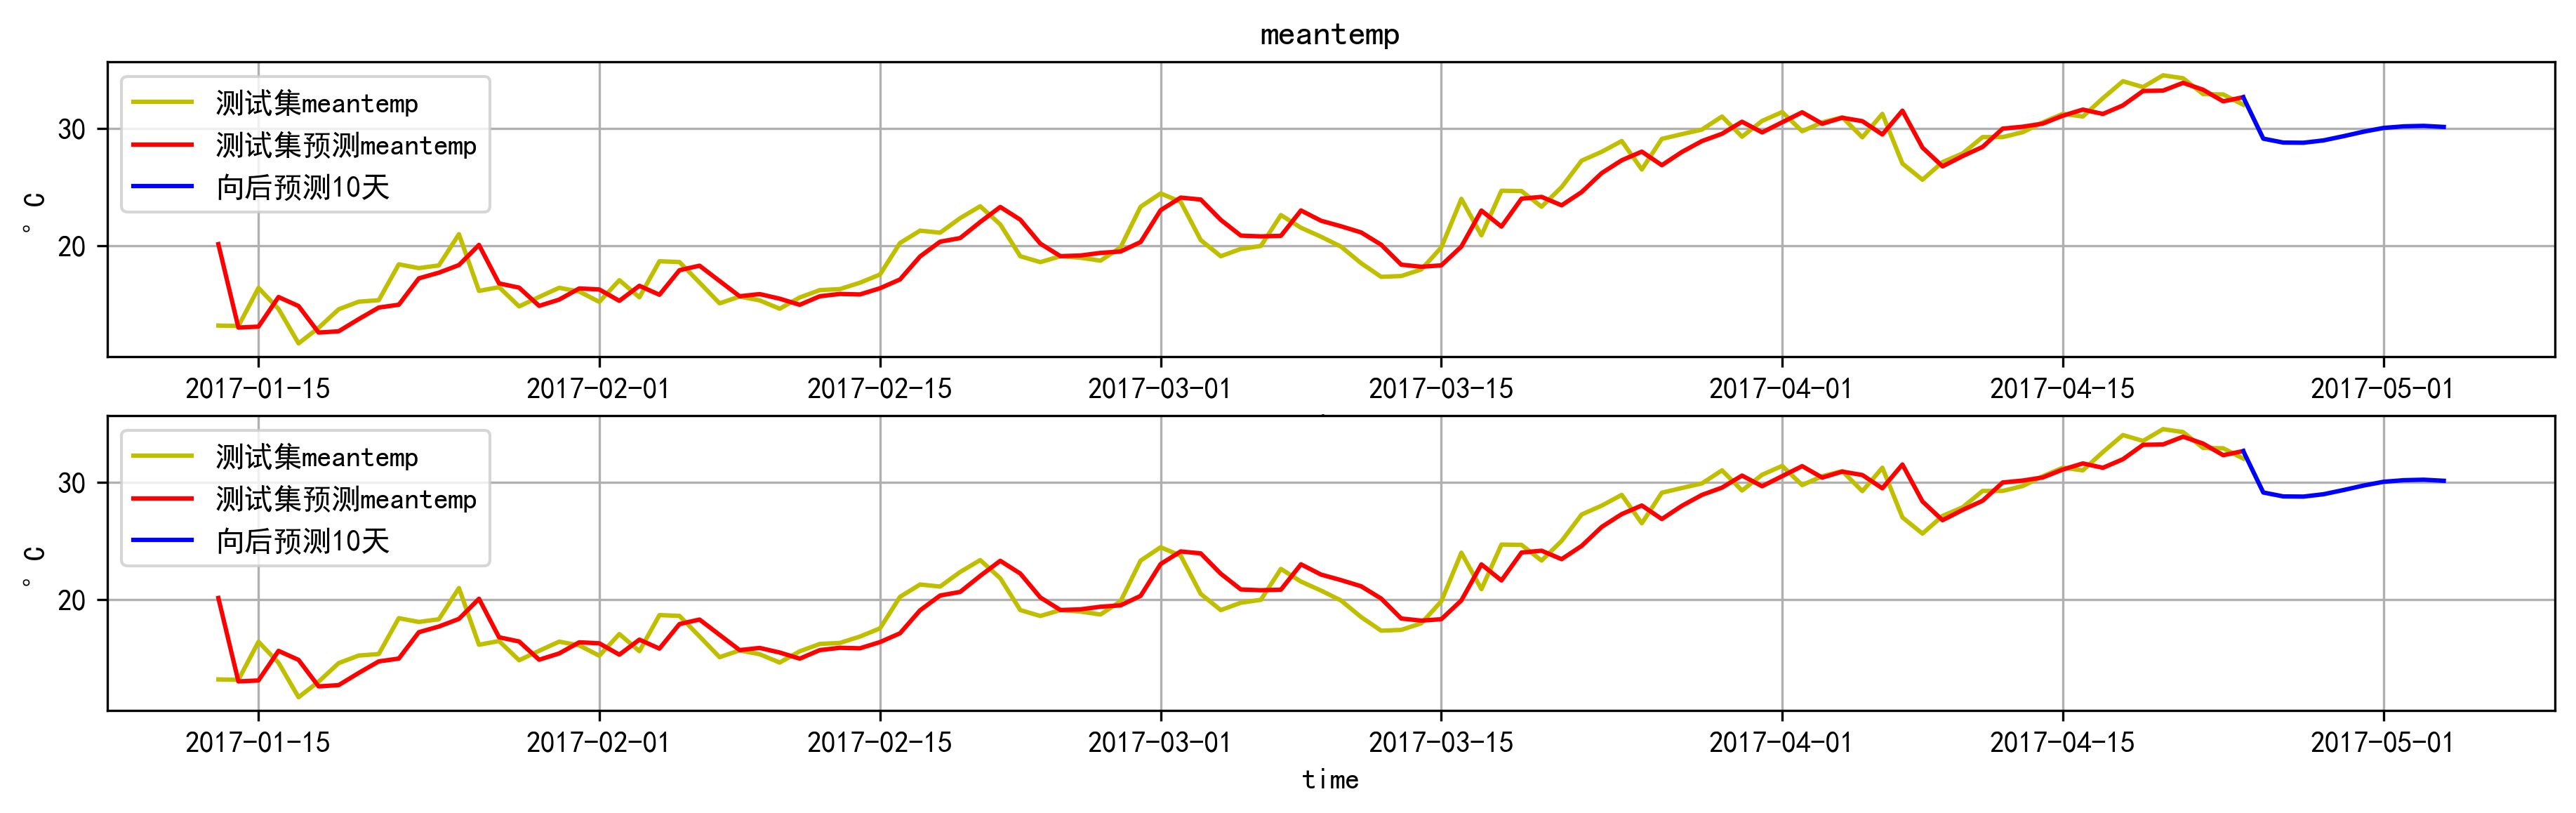

In [23]:
series = np.array(predicted_values)*(train_max-train_min)+train_min
plt.figure(figsize=(15,4), dpi =300)
plt.subplot(2, 1, 1)
# plt.plot(pd.date_range(start='2013-01-13', end='2016-12-31', freq='D')
#          ,model.predict(train_x)*(train_max-train_min)+train_min, color = 'c', label = '训练集meantemp')
plt.plot(pd.date_range(start='2017-01-13', end='2017-04-24', freq='D')
         ,test_y*(train_max-train_min)+train_min, color = 'y', label = '测试集meantemp')
plt.plot(pd.date_range(start='2017-01-13', end='2017-04-24', freq='D')
         ,y_pred*(train_max-train_min)+train_min, color = 'r', label = '测试集预测meantemp')
plt.plot(pd.date_range(start='2017-04-24', end='2017-05-4', freq='D'), series, color = 'b', label = '向后预测10天')
plt.title('meantemp')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('°C')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(pd.date_range(start='2017-01-13', end='2017-04-24', freq='D')
         ,test_y*(train_max-train_min)+train_min, color = 'y', label = '测试集meantemp')
plt.plot(pd.date_range(start='2017-01-13', end='2017-04-24', freq='D')
         ,y_pred*(train_max-train_min)+train_min, color = 'r', label = '测试集预测meantemp')
plt.plot(pd.date_range(start='2017-04-24', end='2017-05-4', freq='D'), series, color = 'b', label = '向后预测10天')

plt.grid(True)
plt.xlabel('time')
plt.ylabel('°C')
plt.legend()
plt.show()